# ANALIZA WZORÓW BLOKADY TELEFONÓW KOMÓRKOWYCH - PRACA INŻYNIERSKA
## KRYSTEK KINGA
### POLITECHNIKA RZESZOWSKA
### Analiza wzorów

### 1. Biblioteki

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import scipy.stats as stats
import ast
import random

### 2. Import pliku CSV

In [18]:
file_url = 'https://raw.githubusercontent.com/krystekkinga/Analiza-Wzorow-Blokady/refs/heads/main/exported_data.csv'
df = pd.read_csv(file_url)

2.1. Podstawowe informacje o pliku i danych

In [19]:
# Wyświetlenie kilku pierwszych wierszy
print(df.head())

   age     gender                      pattern
0   49    Kobieta              [0, 3, 6, 7, 8]
1   19    Kobieta  [6, 1, 8, 7, 2, 0, 3, 4, 5]
2   35  Mężczyzna  [6, 3, 0, 1, 4, 7, 8, 5, 2]
3   21  Mężczyzna  [0, 3, 6, 7, 8, 5, 2, 1, 4]
4   20  Mężczyzna              [6, 3, 0, 1, 2]


2.2. Liczba wystąpień unikalnego wzoru blokady

Wyświetlenie losowych wzorów

In [20]:
pattern_counts = df['pattern'].value_counts()
print("Występujące wzory blokady:")
print(pattern_counts)

Występujące wzory blokady:
pattern
[3, 4, 5, 8]                79
[0, 3, 6, 7, 8]             65
[0, 1, 2, 4, 6, 7, 8]       40
[0, 1, 2, 5, 8]             35
[0, 3, 6, 7, 8, 5, 2]       33
                            ..
[2, 1, 3, 6, 7, 8]           1
[3, 6, 7, 8, 5, 2, 1, 0]     1
[0, 3, 6, 7, 8, 5, 2, 1]     1
[2, 4, 6, 3, 0]              1
[0, 3, 4, 1, 2, 5, 8, 6]     1
Name: count, Length: 189, dtype: int64


In [21]:
def visualize_random_patterns_grid(patterns, counts, rows=3, cols=3):
    """
    Wyświetla losowe wzory blokady na siatkach w układzie równych kwadratów.
    Args:
        patterns (list): Lista wzorów blokady w formacie string.
        counts (list): Lista liczby wystąpień każdego wzoru.
        rows (int): Liczba wierszy na siatce (domyślnie 4).
        cols (int): Liczba kolumn na siatce (domyślnie 4).
    """
    # Definicja współrzędnych punktów na siatce 3x3
    coordinates = {
        0: (0, 0), 1: (1, 0), 2: (2, 0),
        3: (0, 1), 4: (1, 1), 5: (2, 1),
        6: (0, 2), 7: (1, 2), 8: (2, 2)
    }

    # Losowy wybór `rows * cols` wzorów
    selected_indices = random.sample(range(len(patterns)), min(len(patterns), rows * cols))
    selected_patterns = [patterns[i] for i in selected_indices]
    selected_counts = [counts[i] for i in selected_indices]

    # Tworzenie siatki wykresów z większymi odstępami
    fig, axes = plt.subplots(
        rows, cols, figsize=(cols * 5, rows * 5),  # Zwiększamy rozmiar wykresów
        gridspec_kw={'hspace': 0.3, 'wspace': 0.3}  # Odstępy między wykresami
    )
    axes = axes.flatten()

    for i, (pattern, count) in enumerate(zip(selected_patterns, selected_counts)):
        ax = axes[i]

        # Konwersja wzoru ze stringa na listę liczb
        pattern_list = ast.literal_eval(pattern)

        # Rysowanie siatki 3x3 z numerami punktów
        for point, (x, y) in coordinates.items():
            ax.plot(x, -y, 'o', color='#DDDED8', markersize=15)  # Punkty siatki
            ax.text(x, -y, str(point), ha='center', va='center', fontsize=15, color='black')  # Numer punktu

        # Rysowanie wzoru blokady
        for j in range(len(pattern_list) - 1):
            start = coordinates[pattern_list[j]]
            end = coordinates[pattern_list[j + 1]]
            ax.plot([start[0], end[0]], [-start[1], -end[1]], color='#7F7F7D', linewidth=2)  # Linie wzoru

        # Rysowanie punktów wzoru
        for point in pattern_list:
            coord = coordinates[point]
            ax.plot(coord[0], -coord[1], 'o', color='#7F7F7D', markersize=15)  # Punkty wzoru
            ax.text(coord[0], -coord[1], str(point), ha='center', va='center', fontsize=15, color='white')  # Numer w środku

        # Tytuł wykresu
        ax.set_title(f"Wzór: {pattern}", fontsize=15)
        ax.axis('off')  # Wyłączenie osi

    # Usunięcie pustych osi (jeśli losujemy mniej wzorów niż `rows * cols`)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

<ipython-input-21-9331e6ae3acc>:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


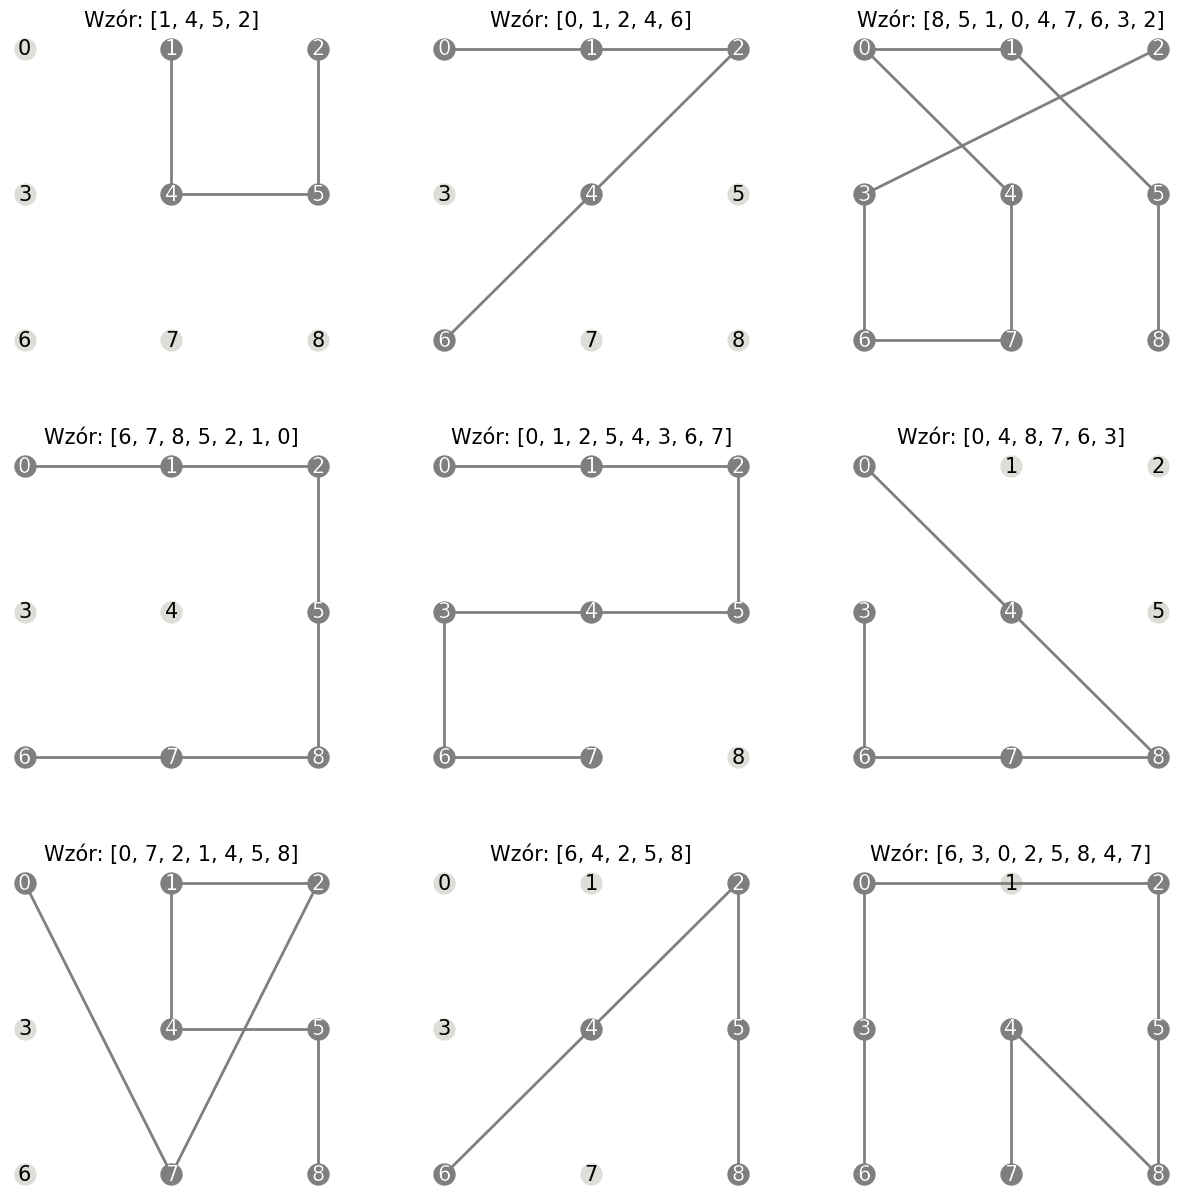

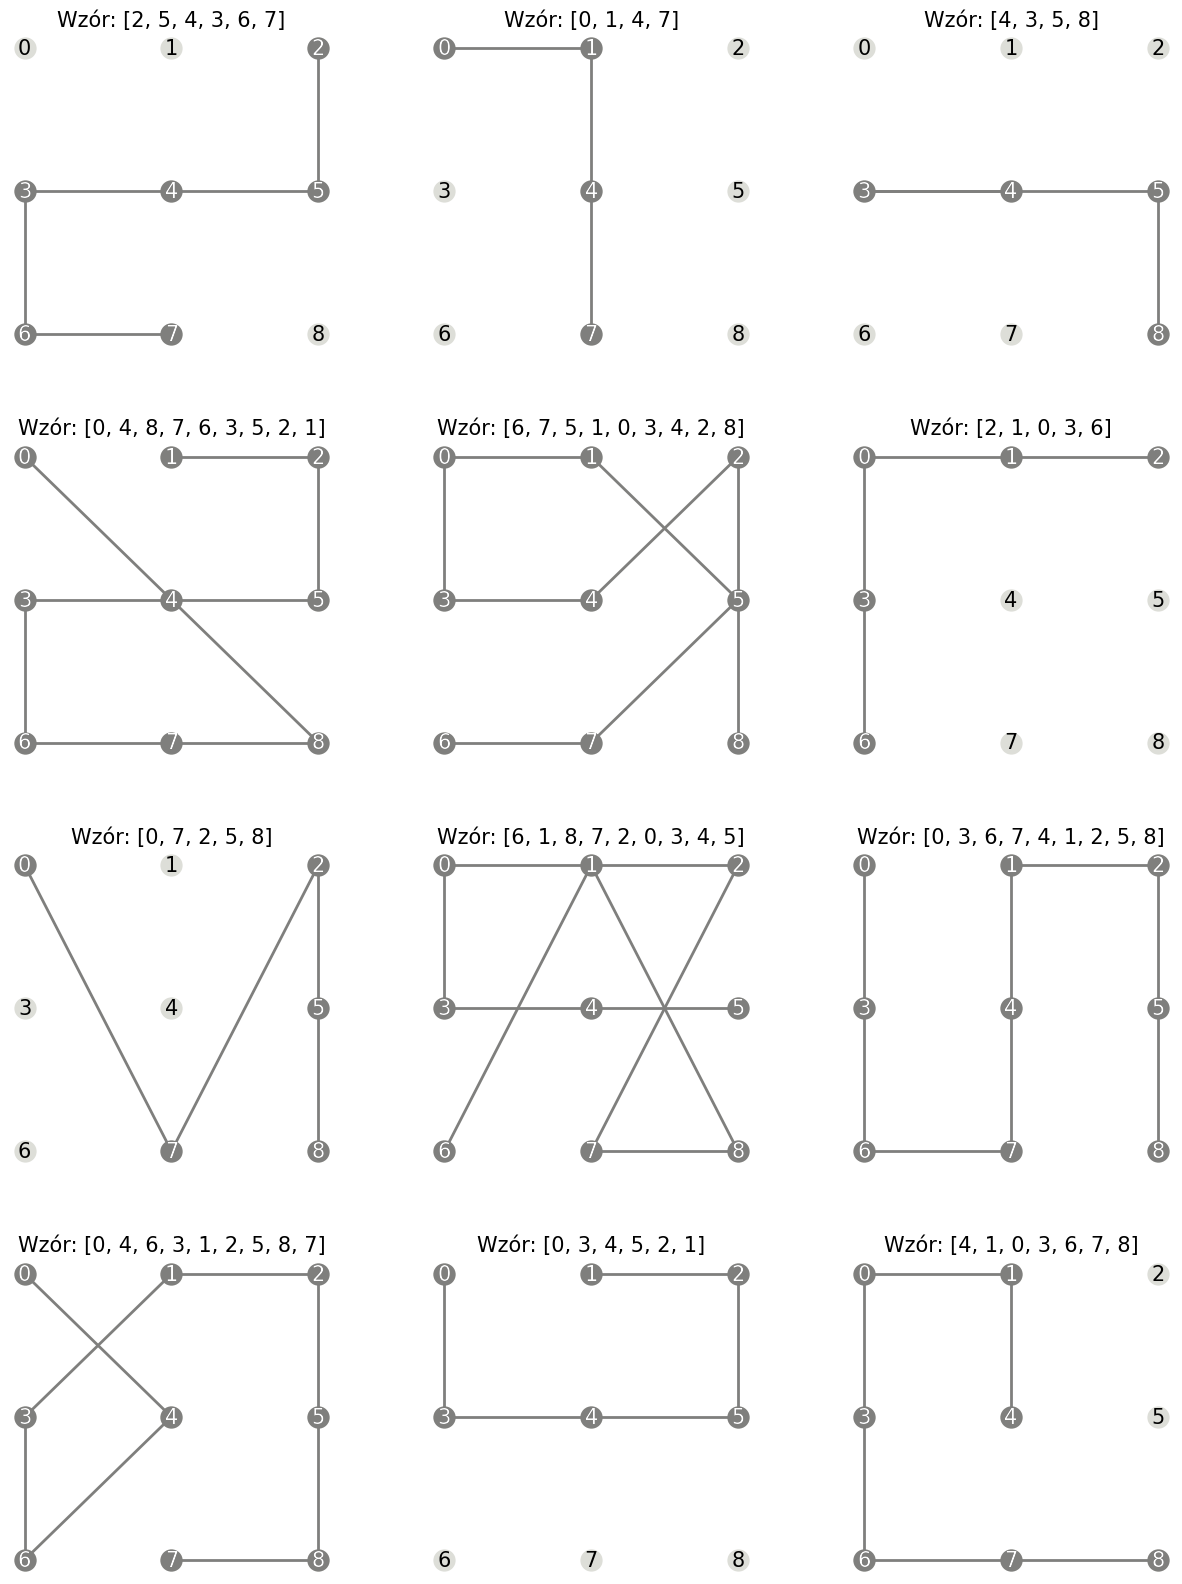

In [22]:
# Lista wzorów i liczby wystąpień
random_patterns = pattern_counts.index.tolist()  # Wzory blokady
random_counts = pattern_counts.values.tolist()  # Liczba wystąpień

# Wywołanie funkcji
visualize_random_patterns_grid(random_patterns, random_counts)
visualize_random_patterns_grid(random_patterns, random_counts, 4, 3)

In [23]:
# Liczba unikalnych wartości dla każdej kolumny
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unikalne wartości")

age: 51 unikalne wartości
gender: 2 unikalne wartości
pattern: 189 unikalne wartości


In [24]:
from collections import Counter

def count_unique_patterns(patterns):
    """
    Zlicza liczbę wzorów, które występują dokładnie raz w liście `patterns`.
    Args:
        patterns (list): Lista wzorów w formie stringów.
    Returns:
        int: Liczba wzorów, które występują dokładnie raz.
    """
    # Zliczanie wystąpień każdego wzoru
    pattern_counts = Counter(patterns)

    # Liczenie wzorów, które występują dokładnie raz
    unique_count = sum(1 for count in pattern_counts.values() if count == 1)

    return unique_count

In [25]:
unique_patterns_count = count_unique_patterns(df['pattern'])
print(f"Liczba wzorów, które występują dokładnie raz: {unique_patterns_count}")

Liczba wzorów, które występują dokładnie raz: 126


2.3. Najczęstsze i najrzadsze wzory

In [26]:
# Wyświetlenie wektorów 10 najczęstszych wzorów
print(pattern_counts.head(10))

pattern
[3, 4, 5, 8]                   79
[0, 3, 6, 7, 8]                65
[0, 1, 2, 4, 6, 7, 8]          40
[0, 1, 2, 5, 8]                35
[0, 3, 6, 7, 8, 5, 2]          33
[6, 3, 0, 4, 2, 5, 8]          28
[0, 3, 6, 4, 8, 5, 2]          25
[6, 3, 0, 4, 8, 5, 2]          24
[2, 1, 0, 3, 4, 5, 8, 7, 6]    21
[0, 3, 4, 5, 8]                20
Name: count, dtype: int64


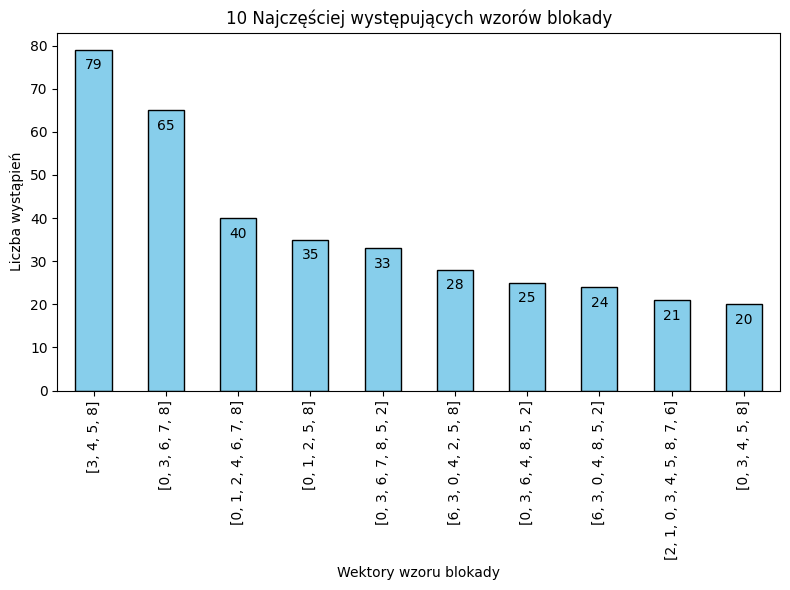

In [27]:
# Wykres wektorów najczęstszych wzorów blokady wraz z liczbą użytkowników, którzy go użyli
plt.figure(figsize=(8, 6))
ax = pattern_counts.head(10).plot(kind='bar', color='skyblue', edgecolor='black')
for idx, value in enumerate(pattern_counts.head(10).values):
    ax.text(idx, value - 2, str(value), ha='center', va='top', fontsize=10, color='black')
plt.title("10 Najczęściej występujących wzorów blokady")
plt.xlabel("Wektory wzoru blokady")
plt.ylabel("Liczba wystąpień")
plt.tight_layout()
plt.show()

In [28]:
def visualize_multiple_patterns(patterns, counts, rows=2, cols=5):
    """
    Wyświetla kilka wzorów blokady na siatkach w układzie określonym przez rows i cols.

    Args:
        patterns (list): Lista wzorów blokady w formacie string.
        counts (list): Liczba wystąpień każdego wzoru.
        rows (int): Liczba rzędów w siatce.
        cols (int): Liczba kolumn w siatce.
    """
    # Definicja współrzędnych punktów na siatce 3x3
    coordinates = {
        0: (0, 0), 1: (1, 0), 2: (2, 0),
        3: (0, 1), 4: (1, 1), 5: (2, 1),
        6: (0, 2), 7: (1, 2), 8: (2, 2)
    }
    fig, axes = plt.subplots(
        rows, cols, figsize=(cols * 5, rows * 5),  # Zwiększamy rozmiar wykresów
        gridspec_kw={'hspace': 0.4, 'wspace': 0.4}  # Odstępy między wykresami
    )
    axes = axes.flatten()


    for i, (pattern, count) in enumerate(zip(patterns, counts)):
        ax = axes[i]

        # Konwersja wzoru ze stringa na listę liczb
        pattern_list = ast.literal_eval(pattern)

        # Rysowanie siatki 3x3 z numerami punktów
        for point, (x, y) in coordinates.items():
            ax.plot(x, -y, 'o', color='#DDDED8', markersize=20)  # Punkty siatki
            ax.text(x, -y, str(point), ha='center', va='center', fontsize=15, color='black')  # Numer punktu

        # Rysowanie wzoru blokady
        for j in range(len(pattern_list) - 1):
            start = coordinates[pattern_list[j]]
            end = coordinates[pattern_list[j + 1]]
            ax.plot([start[0], end[0]], [-start[1], -end[1]], color='#7F7F7D', linewidth=2)  # Linie wzoru

        # Rysowanie punktów wzoru
        for point in pattern_list:
            coord = coordinates[point]
            ax.plot(coord[0], -coord[1], 'o', color='#7F7F7D', markersize=20)  # Punkty wzoru
            ax.text(coord[0], -coord[1], str(point), ha='center', va='center', fontsize=15, color='white')  # Numer w środku

        ax.axis('off')  # Ukrycie osi współrzędnych
        # Tytuł
        ax.set_title(f"Wzór: {pattern}\nLiczba wystąpień: {count}", fontsize=20)

    # Usunięcie pustych osi
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

<ipython-input-28-72a9abde97a9>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


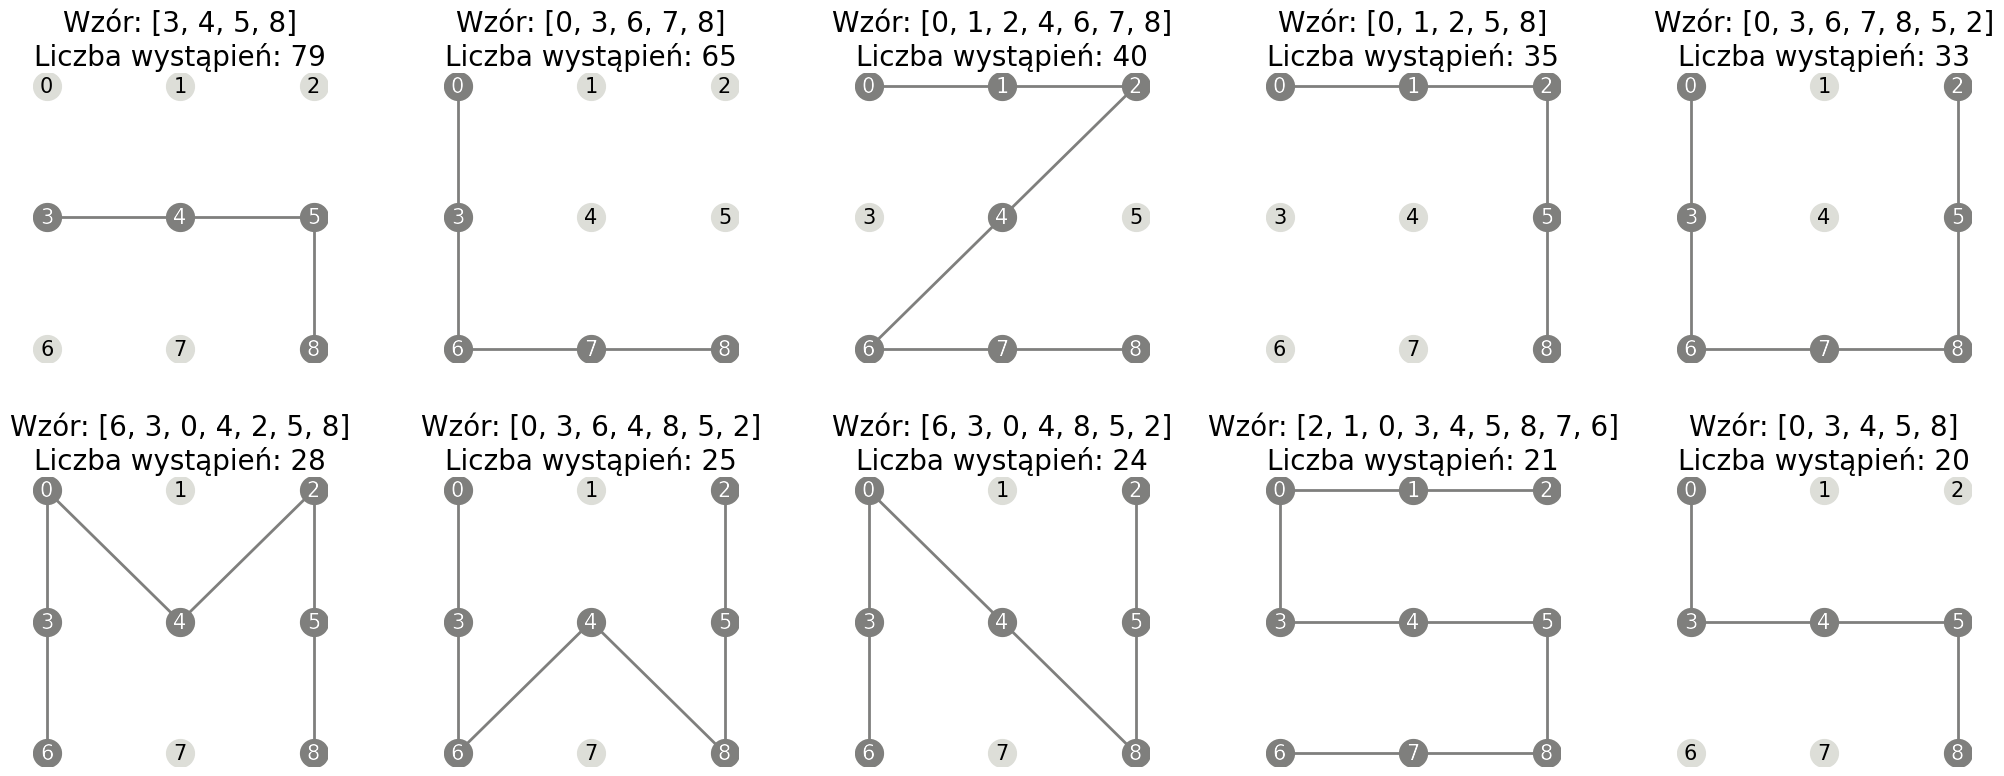

In [29]:
# Wyświetlenie 10 najczęstszych wzorów
top_patterns = pattern_counts.head(10).index.tolist()  # Pobranie wzorów
top_counts = pattern_counts.head(10).values.tolist()  # Pobranie liczby wystąpień

visualize_multiple_patterns(top_patterns, top_counts, 6, 5)

In [30]:
# Wyświetlenie wektorów 10 losowych najrzadszych wzorów
print(pattern_counts.tail(10))

pattern
[6, 1, 8, 7, 2, 0, 3, 4, 5]    1
[0, 1, 2, 5, 4, 3, 6, 7]       1
[1, 6, 7, 8, 4, 0, 3, 5, 2]    1
[3, 4, 7, 8]                   1
[3, 4, 1, 0, 6, 7, 8, 5, 2]    1
[2, 1, 3, 6, 7, 8]             1
[3, 6, 7, 8, 5, 2, 1, 0]       1
[0, 3, 6, 7, 8, 5, 2, 1]       1
[2, 4, 6, 3, 0]                1
[0, 3, 4, 1, 2, 5, 8, 6]       1
Name: count, dtype: int64


<ipython-input-28-72a9abde97a9>:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


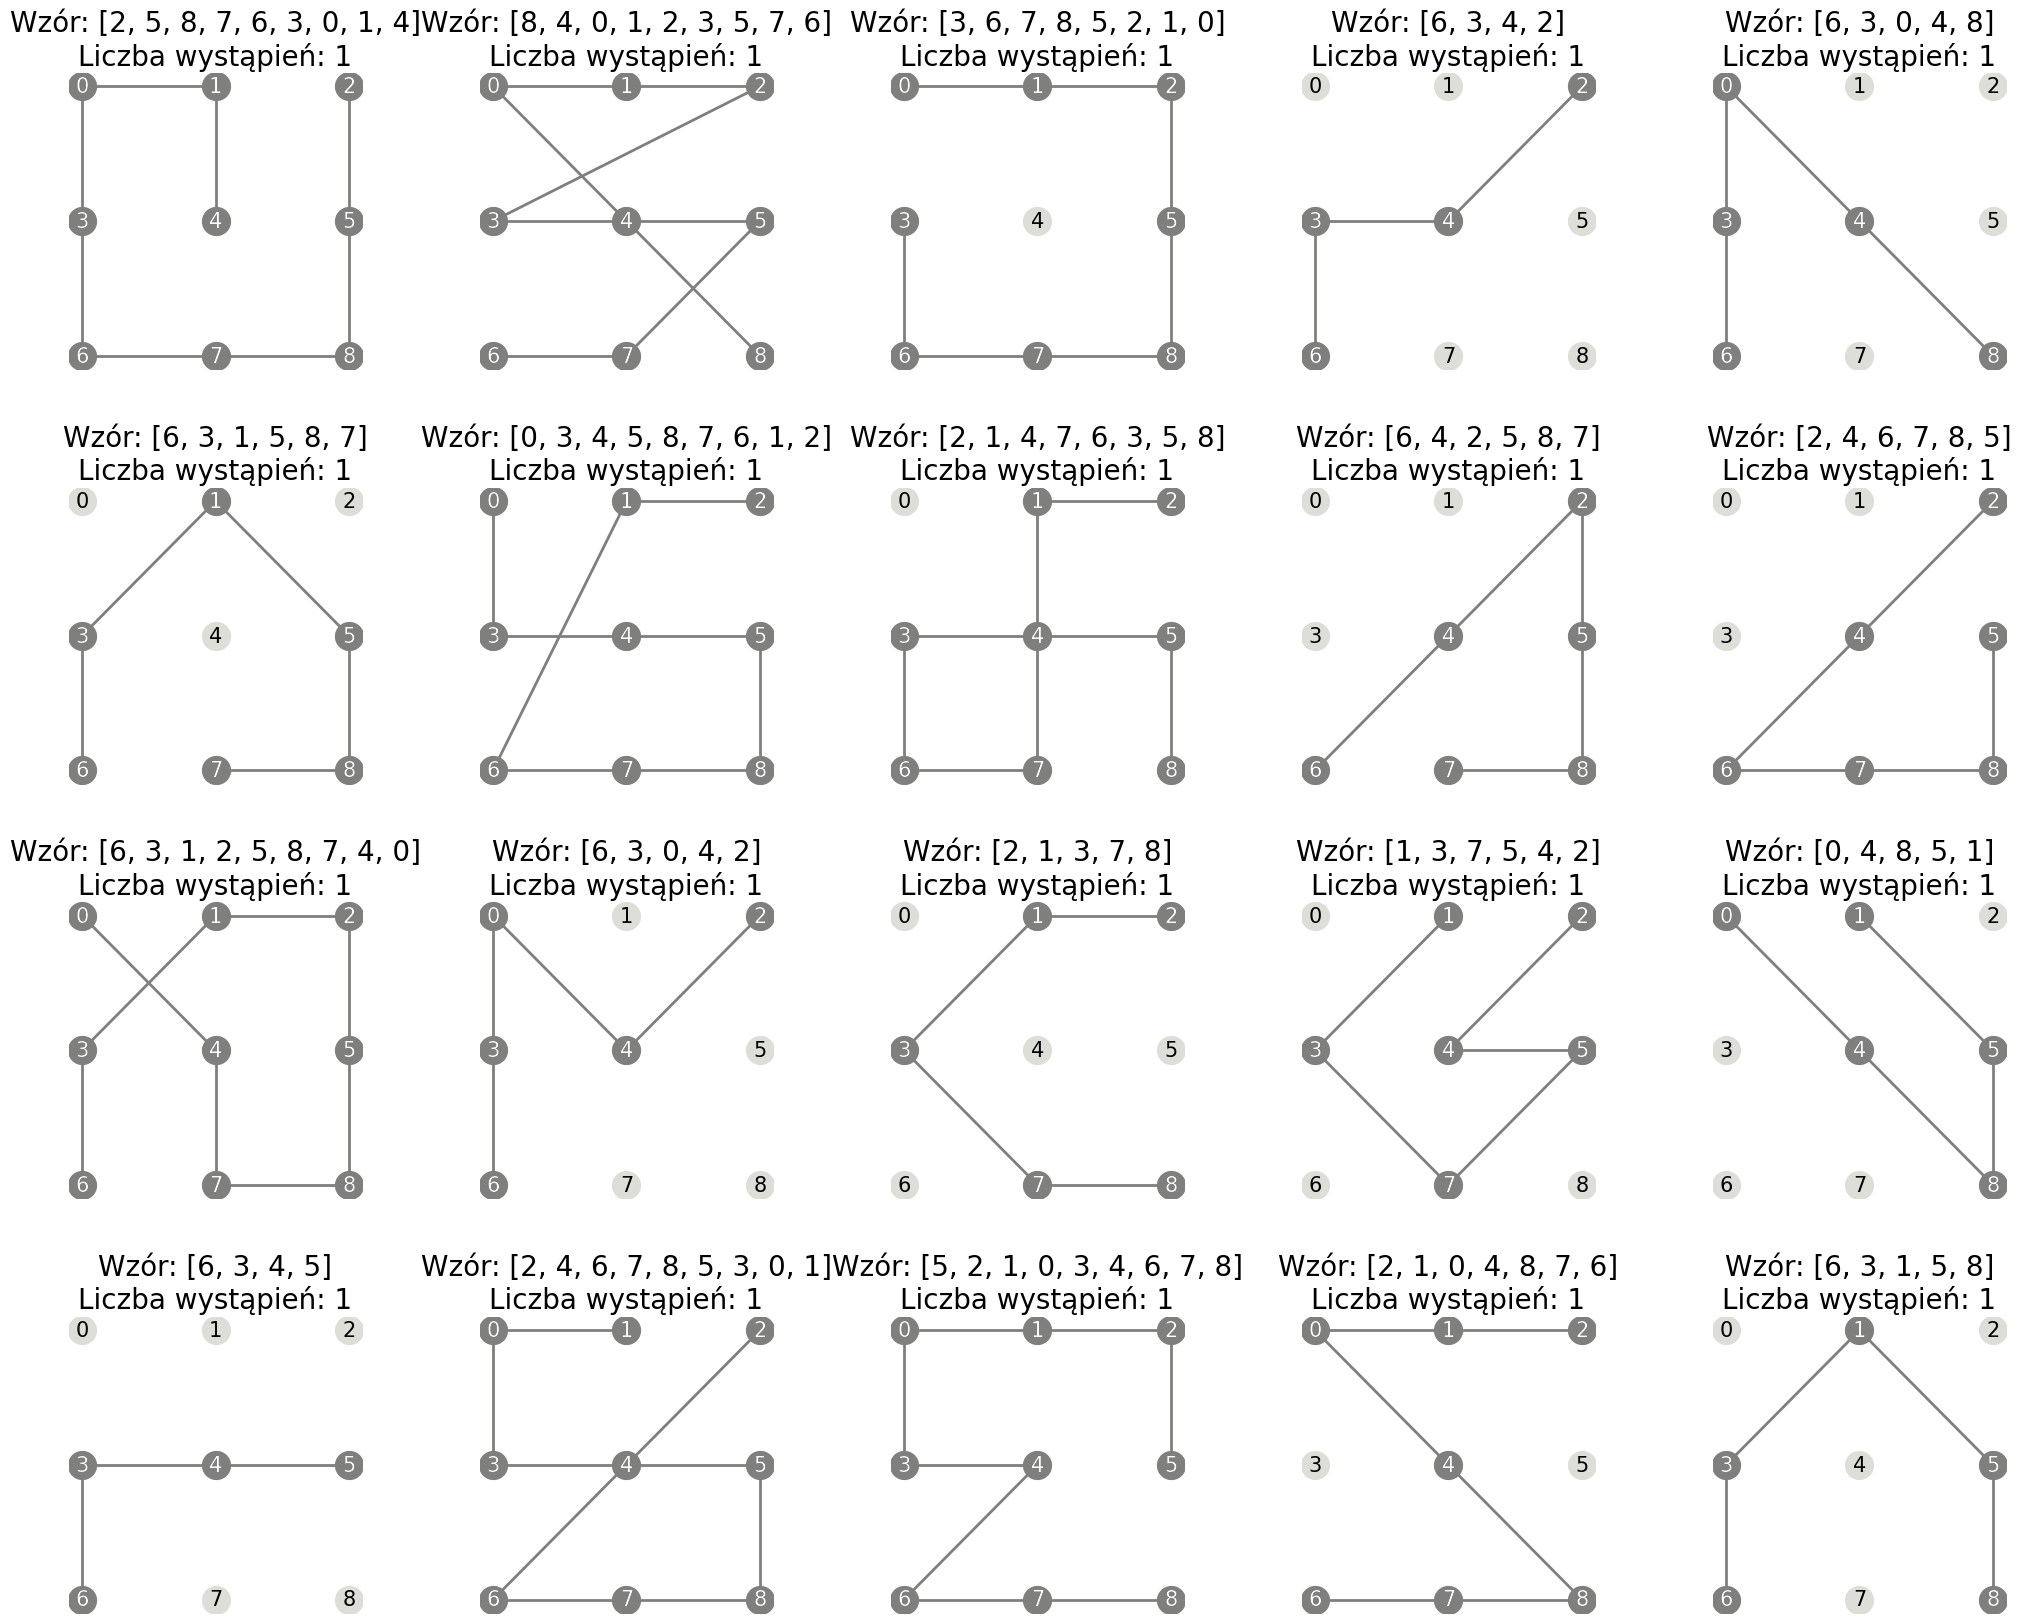

In [31]:
# Wyświetlenie 10 wzorów z jednym wystąpieniem (losowo, ponieważ jest ich ponad 100)
# Filtracja wzorów z jednym wystąpieniem
single_occurrence_patterns = pattern_counts[pattern_counts == 1].index.tolist()

# Losowanie 10 wzorów spośród tych, które mają dokładnie jedno wystąpienie
random_patterns = random.sample(single_occurrence_patterns, 20)

# Ustawienie liczby wystąpień na 1 dla każdego wzoru
random_counts = [1] * len(random_patterns)

# Wizualizacja wybranych wzorów
visualize_multiple_patterns(random_patterns, random_counts, 4, 5)

2.4. Wyświetlanie losowego wzoru blokady

In [32]:
def visualize_pattern(pattern, pattern_number=None):
    """
    Funkcja wizualizująca wzór blokady na siatce 3x3
    Argumenty:
        pattern (str): Wzór blokady jako lista liczb w formacie string (np. "[0, 3, 4, 8]")
        pattern_number (int, opcjonalny): Numer wzoru blokady (domyślnie None)
    """
    # Konwersja wzoru ze stringa na listę liczb
    pattern_list = ast.literal_eval(pattern)

    # Definicja współrzędnych punktów na siatce 3x3
    coordinates = {
        0: (0, 0), 1: (1, 0), 2: (2, 0),
        3: (0, 1), 4: (1, 1), 5: (2, 1),
        6: (0, 2), 7: (1, 2), 8: (2, 2)
    }

    # Tworzenie wykresu
    plt.figure(figsize=(4, 4))

    # Rysowanie siatki 3x3 z numerami punktów
    for point, (x, y) in coordinates.items():
        plt.plot(x, y, 'o', color='#DDDED8', markersize=20)  # Punkty siatki
        plt.text(x, y, str(point), ha='center', va='center', fontsize=8, color='black')  # Numer punktu

    # Rysowanie wzoru blokady
    for i in range(len(pattern_list) - 1):
        start = coordinates[pattern_list[i]]
        end = coordinates[pattern_list[i + 1]]
        plt.plot([start[0], end[0]], [start[1], end[1]], color='#7F7F7D', linewidth=2)  # Linie wzoru

    # Rysowanie punktów wzoru
    for point in pattern_list:
        coord = coordinates[point]
        plt.plot(coord[0], coord[1], 'o', color='#7F7F7D', markersize=20)  # Punkty wzoru
        plt.text(coord[0], coord[1], str(point), ha='center', va='center', fontsize=8, color='white')  # Numer punktu

    # Dodanie tytułu z informacją o numerze wzoru i jego wektorze
    title = "Wzór blokady użytkownika"
    if pattern_number is not None:
        title += f" nr {pattern_number}"
    title += f"\nWektor: {pattern}"
    plt.title(title)
    plt.axis('off')

    plt.show()

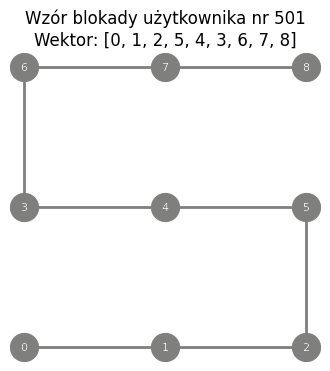

In [33]:
# Wybieranie losowego wzoru
random_row = df.sample(1)
random_pattern = random_row['pattern'].values[0]
pattern_index = random_row.index[0]  # Indeks wzoru
visualize_pattern(random_pattern, pattern_index)

### 3. Analiza użytkowników

Zdefiniowanie przedziałów wiekowych

In [39]:
# Tworzenie przedziałów wiekowych
bins = [0, 18, 24, 34, 49, 99]
labels = ['18', '19-24', '25-34', '35-49', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Podział na grupy wiekowe
print("Grupy wiekowe:\n", df['age_group'].value_counts())

# Obliczenie liczby użytkowników w każdej grupie wiekowej
group_counts = df['age_group'].value_counts().sort_index()

Grupy wiekowe:
 age_group
19-24    383
25-34    133
35-49    133
50+       60
18        47
Name: count, dtype: int64


Histogram z podziałem na grupy wiekowe

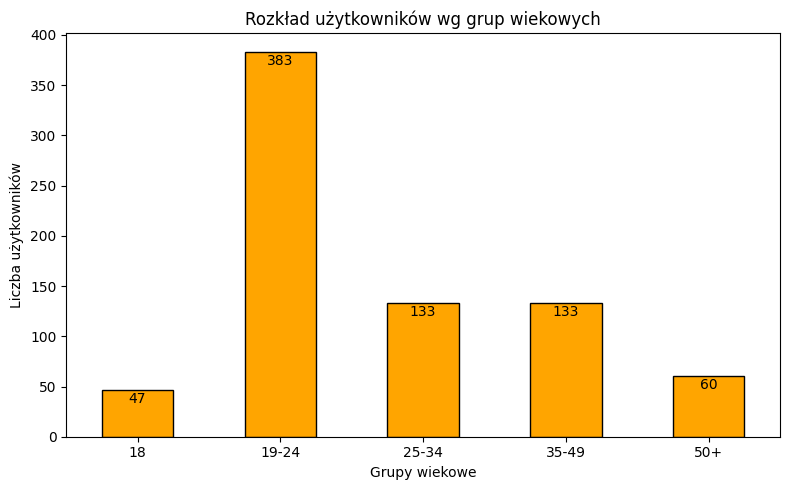

In [40]:
# Histogram z podziałem na grupy wiekowe
plt.figure(figsize=(8, 5))
ax = df['age_group'].value_counts(sort=False).plot(kind='bar', color='orange', edgecolor='black')
for idx, value in enumerate(df['age_group'].value_counts(sort=False).values):
    ax.text(idx, value - 2, str(value), ha='center', va='top', fontsize=10, color='black')
plt.title("Rozkład użytkowników wg grup wiekowych")
plt.xlabel("Grupy wiekowe")
plt.ylabel("Liczba użytkowników")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 4. Analiza najczęstszych wyborów

In [41]:
# Funkcja do wyboru 5 najczęstszych wzorów blokady w grupie
def top_5_patterns(group):
    return group['pattern'].value_counts().head(5)

# Grupowanie wg grup wiekowych
age_group_patterns = df.groupby('age_group').apply(top_5_patterns)

# Grupowanie wg płci
gender_patterns = df.groupby('gender').apply(top_5_patterns)

# Wyświetlenie tabeli z podsumowaniem
summary_table = pd.DataFrame({
    "Grupa wiekowa": labels,
    "Liczba użytkowników": group_counts.values
})
summary_table.loc[len(summary_table.index)] = ["Suma", group_counts.sum()]
print(summary_table)

  Grupa wiekowa  Liczba użytkowników
0            18                   47
1         19-24                  383
2         25-34                  133
3         35-49                  133
4           50+                   60
5          Suma                  756


<ipython-input-41-618044499e5e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_patterns = df.groupby('age_group').apply(top_5_patterns)
<ipython-input-41-618044499e5e>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  age_group_patterns = df.groupby('age_group').apply(top_5_patterns)
<ipython-input-41-618044499e5e>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from

<ipython-input-42-24b7fa69353c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, data in age_group_patterns.groupby(level=0):


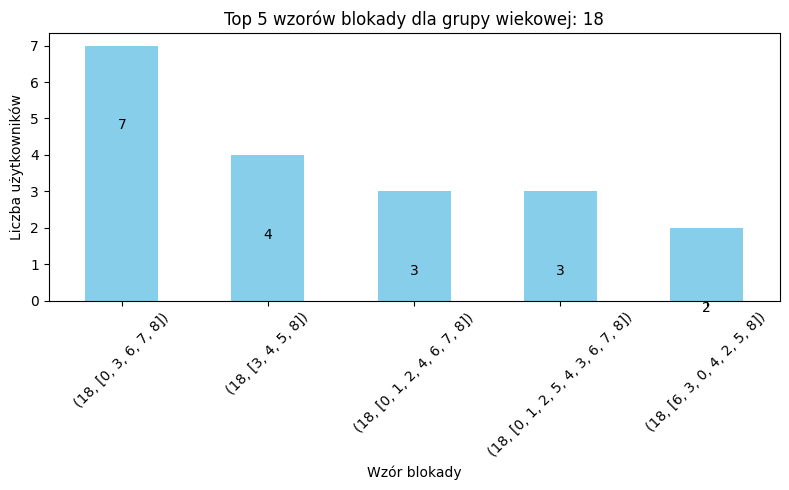

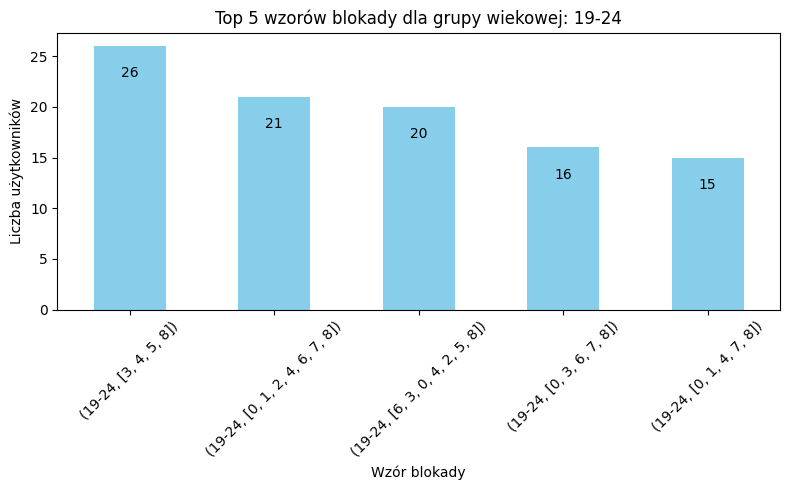

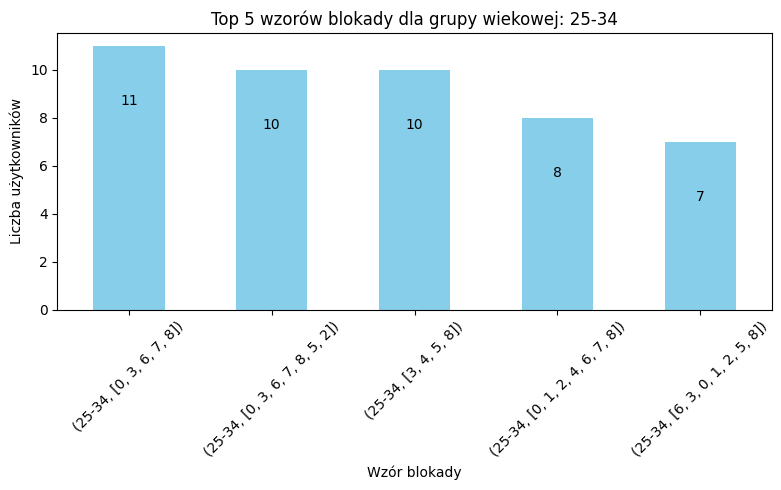

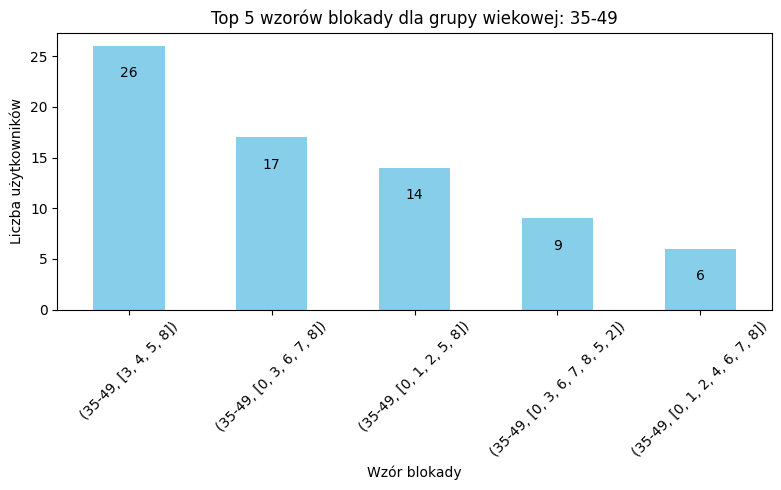

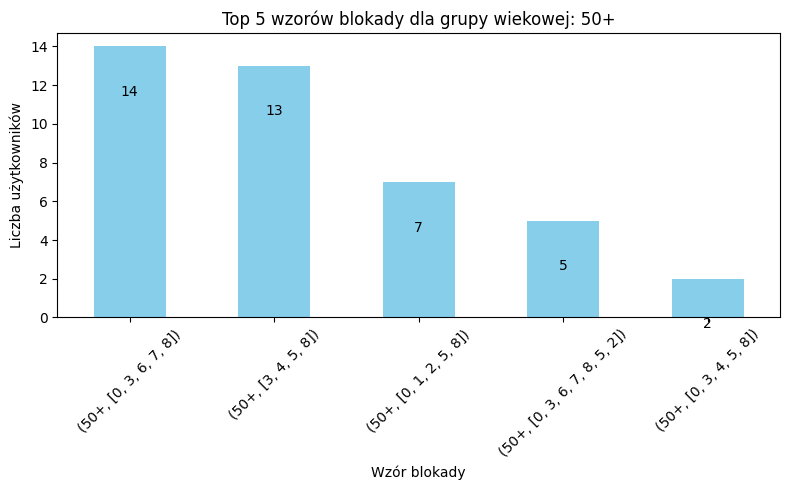

In [42]:
# Wykres dla grup wiekowych
for group, data in age_group_patterns.groupby(level=0):
    plt.figure(figsize=(8, 5))
    ax = data.plot(kind='bar', color='skyblue', figsize=(8, 5))

    # Dodanie liczby użytkowników nad słupkami
    for idx, value in enumerate(data.values):
        ax.text(idx, value - 2, str(value), ha='center', va='top', fontsize=10, color='black')

    plt.title(f"Top 5 wzorów blokady dla grupy wiekowej: {group}")
    plt.xlabel("Wzór blokady")
    plt.ylabel("Liczba użytkowników")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

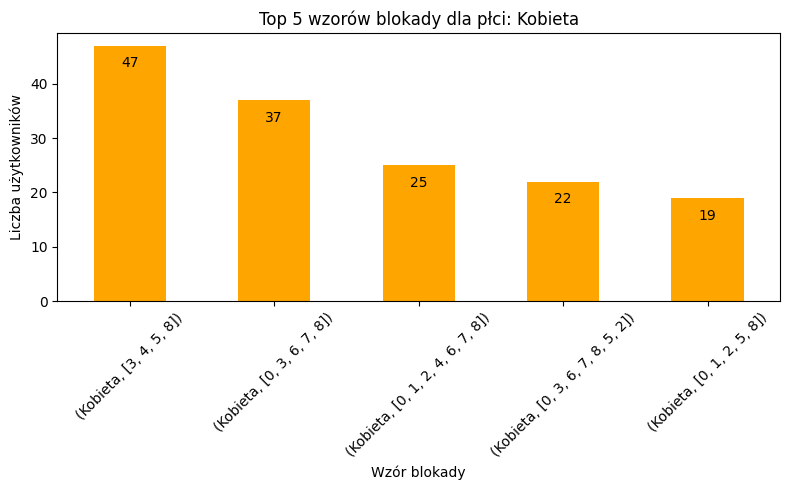

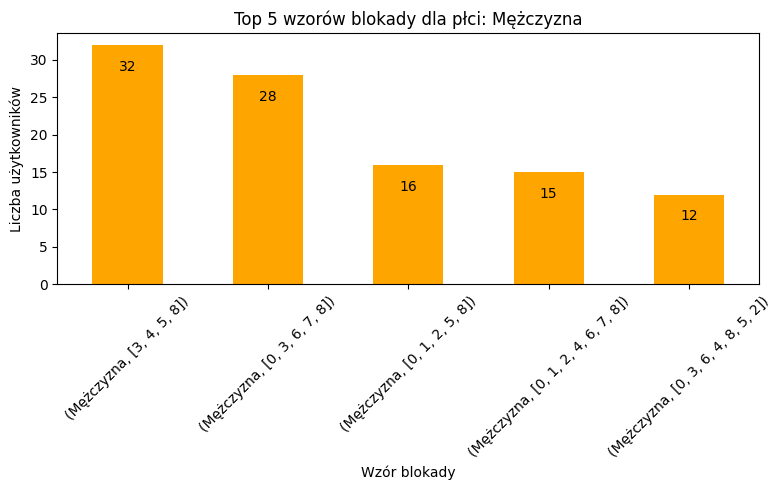

In [38]:
# Wykres dla płci
for gender, data in gender_patterns.groupby(level=0):
    plt.figure(figsize=(8, 5))
    ax = data.plot(kind='bar', color='orange', figsize=(8, 5))

    # Dodanie liczby użytkowników nad słupkami
    for idx, value in enumerate(data.values):
        ax.text(idx, value - 2, str(value), ha='center', va='top', fontsize=10, color='black')

    plt.title(f"Top 5 wzorów blokady dla płci: {gender}")
    plt.xlabel("Wzór blokady")
    plt.ylabel("Liczba użytkowników")
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ustawienia layoutu
    plt.show()

### 5. Analiza punktu startowego wzorów

In [ ]:
# Dodanie kolumny z pierwszym punktem wzoru
df['start_point'] = df['pattern'].str[1]
print(df[['pattern', 'start_point']].head())

# Policzenie częstotliwości występowania każdego punktu startowego
start_point_counts = df['start_point'].value_counts()
print("Częstotliwość punktów startowych:")
print(start_point_counts)

In [ ]:
# Wykres słupkowy dla punktów startowych
plt.figure(figsize=(8, 5))
ax = start_point_counts.plot(kind='bar', color='skyblue', edgecolor='black')
for idx, value in enumerate(start_point_counts.values):
    ax.text(idx, value - 2, str(value), ha='center', va='top', fontsize=10, color='black')
plt.title("Najczęściej używane punkty startowe wzorów blokady")
plt.xlabel("Punkt startowy")
plt.ylabel("Liczba użytkowników")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 6. Analiza liczby użytych punktów względem wieku

In [ ]:
# Konwersja stringów we wzorach blokady na listy liczb
df['pattern'] = df['pattern'].apply(ast.literal_eval)

# Dodanie kolumny z liczbą punktów użytych w wzorze
df['points'] = df['pattern'].apply(lambda x: len(set(x)))

# Grupa wiekowa i średnia liczba punktów
age_groups_points = df.groupby('age_group')['points'].mean()

In [ ]:
# Wykres słupkowy dla średniej liczby punktów względem grup wiekowych
plt.figure(figsize=(8, 5))
ax = age_groups_points.plot(kind='bar', color='green', edgecolor='black')
for idx, value in enumerate(age_groups_points.values):
    ax.text(idx, value - 0.1, f"{value:.2f}", ha='center', va='top', fontsize=10, color='black')
plt.title("Średnia liczba punktów we wzorach blokady dla grup wiekowych")
plt.xlabel("Grupa wiekowa")
plt.ylabel("Średnia liczba punktów")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 7. Analiza korelacji z wiekiem

In [ ]:
# Zamiana wzorów blokady na liczby (kategoryczne)
label_encoder = LabelEncoder()
df['lock_pattern_encoded'] = label_encoder.fit_transform(df['pattern'])

# Podgląd unikalnych wzorów i ich kodowania
print("Unikalne wzory i ich kody:")
for pattern, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{pattern} -> {code}")


7.1. Korelacja Spearmana

In [ ]:
# Obliczanie korelacji Spearmana
correlation_spearman = df['lock_pattern_encoded'].corr(df['age'], method='spearman')
print(f"Korelacja Spearmana między wzorami blokady a wiekiem: {correlation_spearman}")

KeyError: 'lock_pattern_encoded'

7.2. Korelacja Pearsona

In [ ]:
# Obliczanie korelacji Pearsona
correlation_pearson = df['lock_pattern_encoded'].corr(df['age'], method='pearson')
print(f"Korelacja Pearsona między wzorami blokady a wiekiem: {correlation_pearson}")

7.3. Test ANOVA

In [ ]:
# ANOVA dla różnych grup wiekowych
anova_result = stats.f_oneway(
    df[df['age_group'] == '<=18']['lock_pattern_encoded'],
    df[df['age_group'] == '19-24']['lock_pattern_encoded'],
    df[df['age_group'] == '25-34']['lock_pattern_encoded'],
    df[df['age_group'] == '35-49']['lock_pattern_encoded'],
    df[df['age_group'] == '50+']['lock_pattern_encoded']
)
print("Wynik ANOVA (p-value):", anova_result.pvalue)